# Exploratory Data Analysis using Python - A Case Study

*Analyzing responses from the Stack Overflow Annual Developer Survey 2020*

![](https://i.imgur.com/qXhHKqv.png)

#### Importing Pandas and reading csv files

In [1]:
import pandas as pd

In [2]:
survey_raw_df = pd.read_csv('survey_results_public.csv') #reading survey_results_public.csv file

In [3]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [4]:
survey_raw_df.columns #to get list of columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
schema_raw = pd.read_csv('survey_results_schema.csv', index_col='Column').QuestionText

In [6]:
schema_raw #Printing out the schema series

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

## Data Preparation & Cleaning
Areas of our analysis-:
- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

In [7]:
required_columns=[
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [8]:
survey_df = survey_raw_df[required_columns].copy() #extracting copy of required columns from actual data set

In [9]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
survey_df.info() #checking the data types of selected columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

#### Checking Some colums and cleaing them

In [11]:
#Actual ques corresponding to the column Age1stCode
schema_raw.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [12]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [13]:
#Actual ques corresponding to the column YearsCode
schema_raw.YearsCode

'Including any education, how many years have you been coding in total?'

In [14]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [15]:
#Actual ques corresponding to the column YearsCodePro
schema_raw.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [16]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [17]:
#converting String values to int
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Viewing some basic statistics about numeric columns before hand.

In [18]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


We are having minimum value of Age column equal to 1 and maximum value equal to 279. Which seems to be invalid, so we can fix that by droping some values. 

In [19]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)
The same holds for WorkWeekHrs. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day)

In [20]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [21]:
#The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.
survey_df.Gender.unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [22]:
import numpy as np

In [23]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [24]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
15308,Canada,32.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,13.0,10.0,Bash/Shell/PowerShell;Haskell;JavaScript;Pytho...,Bash/Shell/PowerShell;JavaScript;Julia;Kotlin;...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Data scientist or machine learning specialist;...,40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Fairly important
6547,India,30.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A business discipline (such as accounting, fin...",Yes,14.0,7.0,5.0,Python;SQL,C++;JavaScript;SQL;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Academic researcher;Data or business analyst;D...,45.0,Slightly satisfied,Diversity of the company or organization;Speci...,Sometimes: 1-2 days per month but less than we...,Somewhat important
52399,United States,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,15.0,7.0,HTML/CSS;JavaScript;TypeScript,Python,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, front-end;Developer, full-stack",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Rarely: 1-2 days per year or less,Very important
12349,France,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,6.0,2.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,NaN,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, full-stack",36.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Somewhat important
5640,India,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,15.0,6.0,2.0,C;HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript;Python,Once every few years,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Very important
50889,Poland,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,9.0,9.0,NaN,Dart;Java;Kotlin;Rust,Rust,Once a year,Play games;Visit Stack Overflow;Do other work ...,Student,NaN,NaN,NaN,NaN,NaN,NaN
10925,Turkey,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A business discipline (such as accounting, fin...",Yes,13.0,10.0,8.0,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;SQL,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;SQL,Once a year,Call a coworker or friend;Watch help / tutoria...,Employed full-time,Data or business analyst;Database administrato...,NaN,NaN,NaN,NaN,Fairly important
19558,United States,61.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A natural science (such as biology, chemistry,...",Yes,15.0,40.0,35.0,Java;JavaScript,NaN,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",50.0,Very satisfied,Financial performance or funding status of the...,Often: 1-2 days per week or more,Very important
14194,United States,22.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,12.0,6.0,2.0,Dart;HTML/CSS;JavaScript;Python;R;SQL;TypeScript,Dart;Go;HTML/CSS;JavaScript;Python;TypeScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Data or business analyst;Database administrato...,50.0,Slightly satisfied,"Flex time 

## Exploratory Analysis and Visualization

In [25]:
# Importing matplotlib.pyplot and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 17
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country


###### Analysing Country Column in the data frame

In [26]:
countries=survey_df.Country.value_counts().head(20) # Counting number of survey submitted by each country

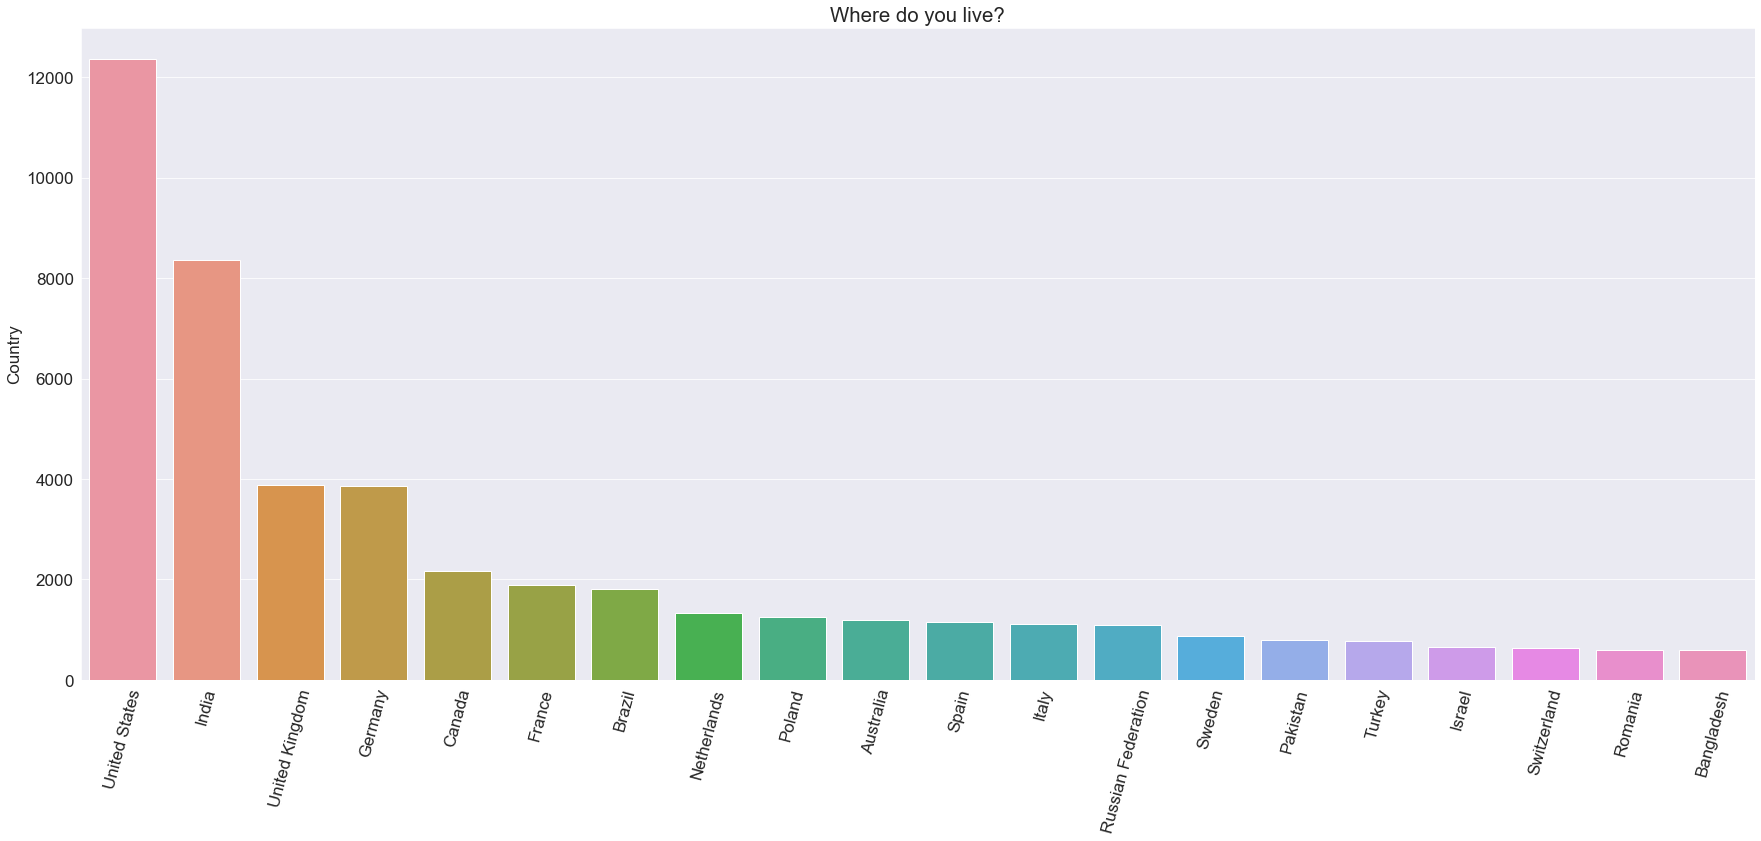

In [27]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=75)
plt.title(schema_raw.Country)
sns.barplot(x=countries.index,y=countries);

### Age


###### Analysing Age Column in the data frame

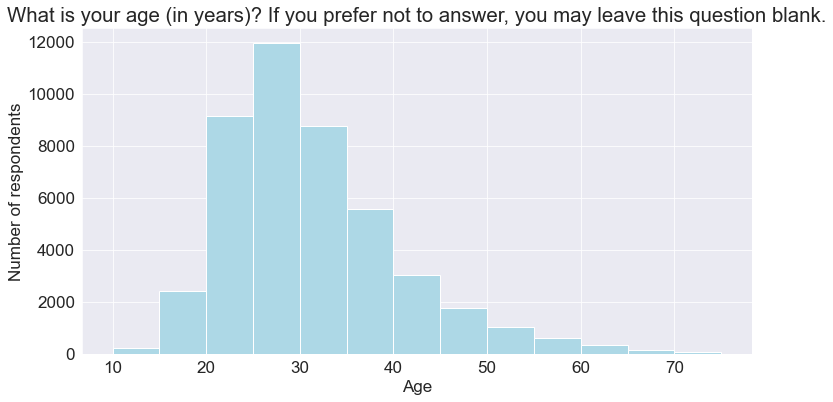

In [28]:
plt.figure(figsize=(12, 6))
plt.title(schema_raw.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='lightblue');

In [29]:
# Creating New column Age group
age_group=[]
for i in survey_df.Age:
    if i<10:
        age_group.append("Less than 10 years")
    elif i>=10 and i<18:
        age_group.append("10-18")
    elif i>=18 and i<30:
        age_group.append("18-30")
    elif i>=30 and i<45:
        age_group.append("30-45")
    elif i>=45 and i<60:
        age_group.append("45-60")
    elif i>=60:
        age_group.append("Older than 60")
    else:
        age_group.append(np.NaN)
        
survey_df['Age_group']=age_group        

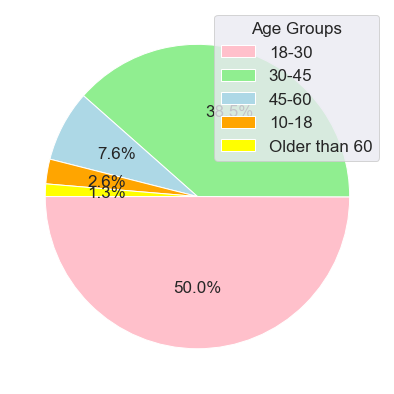

In [30]:
# Analysing the new Age_group column 

agegroup_count=survey_df.Age_group.value_counts()
plt.figure(figsize=(36,7))
plt.pie(agegroup_count,autopct='%1.1f%%',startangle=180,colors=['pink','lightgreen','lightblue','orange','yellow'])
plt.legend(labels=agegroup_count.index,title = "Age Groups");

### Gender

###### Analysing Gender Column in the data frame

In [31]:
schema_raw.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [32]:
gen_count=survey_df.Gender.value_counts(dropna=False)
gen_count

Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

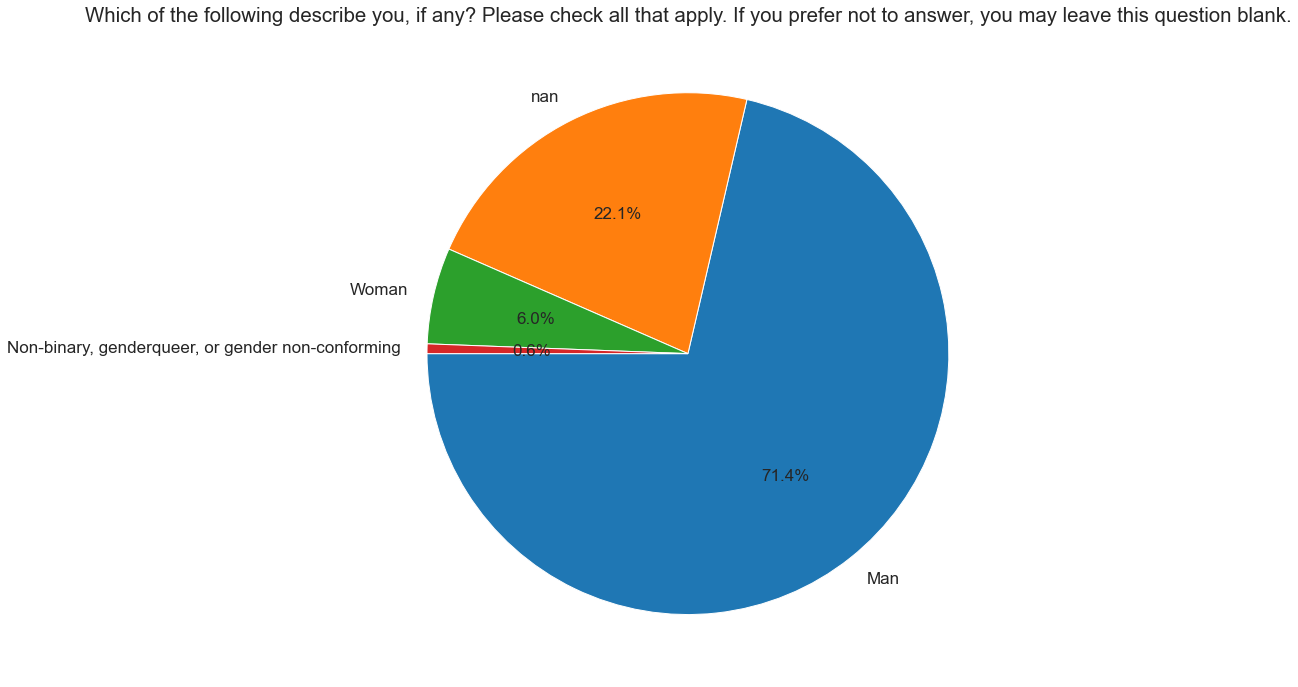

In [33]:
plt.figure(figsize=(36,12))
plt.title(schema_raw.Gender)
plt.pie(gen_count, labels=gen_count.index,autopct='%1.1f%%',startangle=180);

### Education Level


###### Analysing Education Column in the data frame

In [34]:
schema_raw.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [35]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

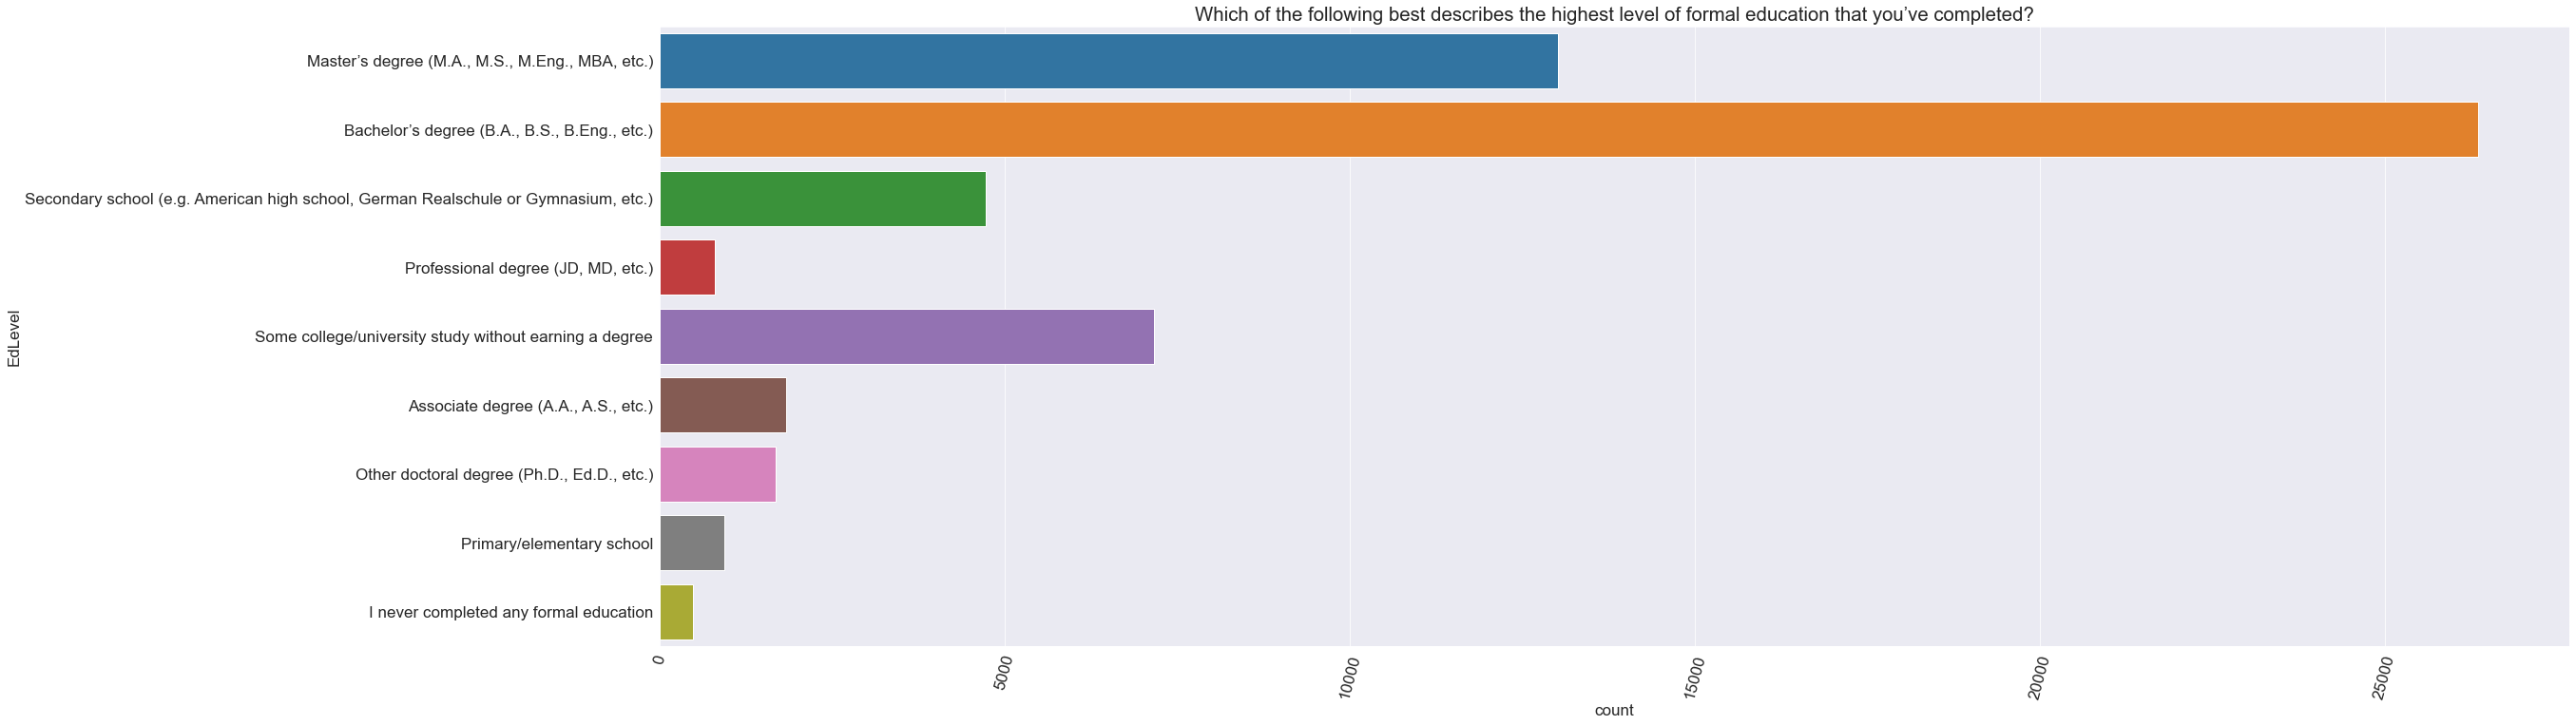

In [36]:
plt.figure(figsize=(36,12))
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema_raw.EdLevel);

###### Primary Field of Study

###### Analysing Primary field of education

In [37]:
schema_raw.UndergradMajor

'What was your primary field of study?'

In [38]:
survey_df.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31353
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4735
Information systems, information technology, or system administration              4041
A natural science (such as biology, chemistry, physics, etc.)                      2185
Mathematics or statistics                                                          1836
Web development or web design                                                      1773
A business discipline (such as accounting, finance, marketing, etc.)               1367
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
I never declared a major                                                            448
A health science (such as nursin

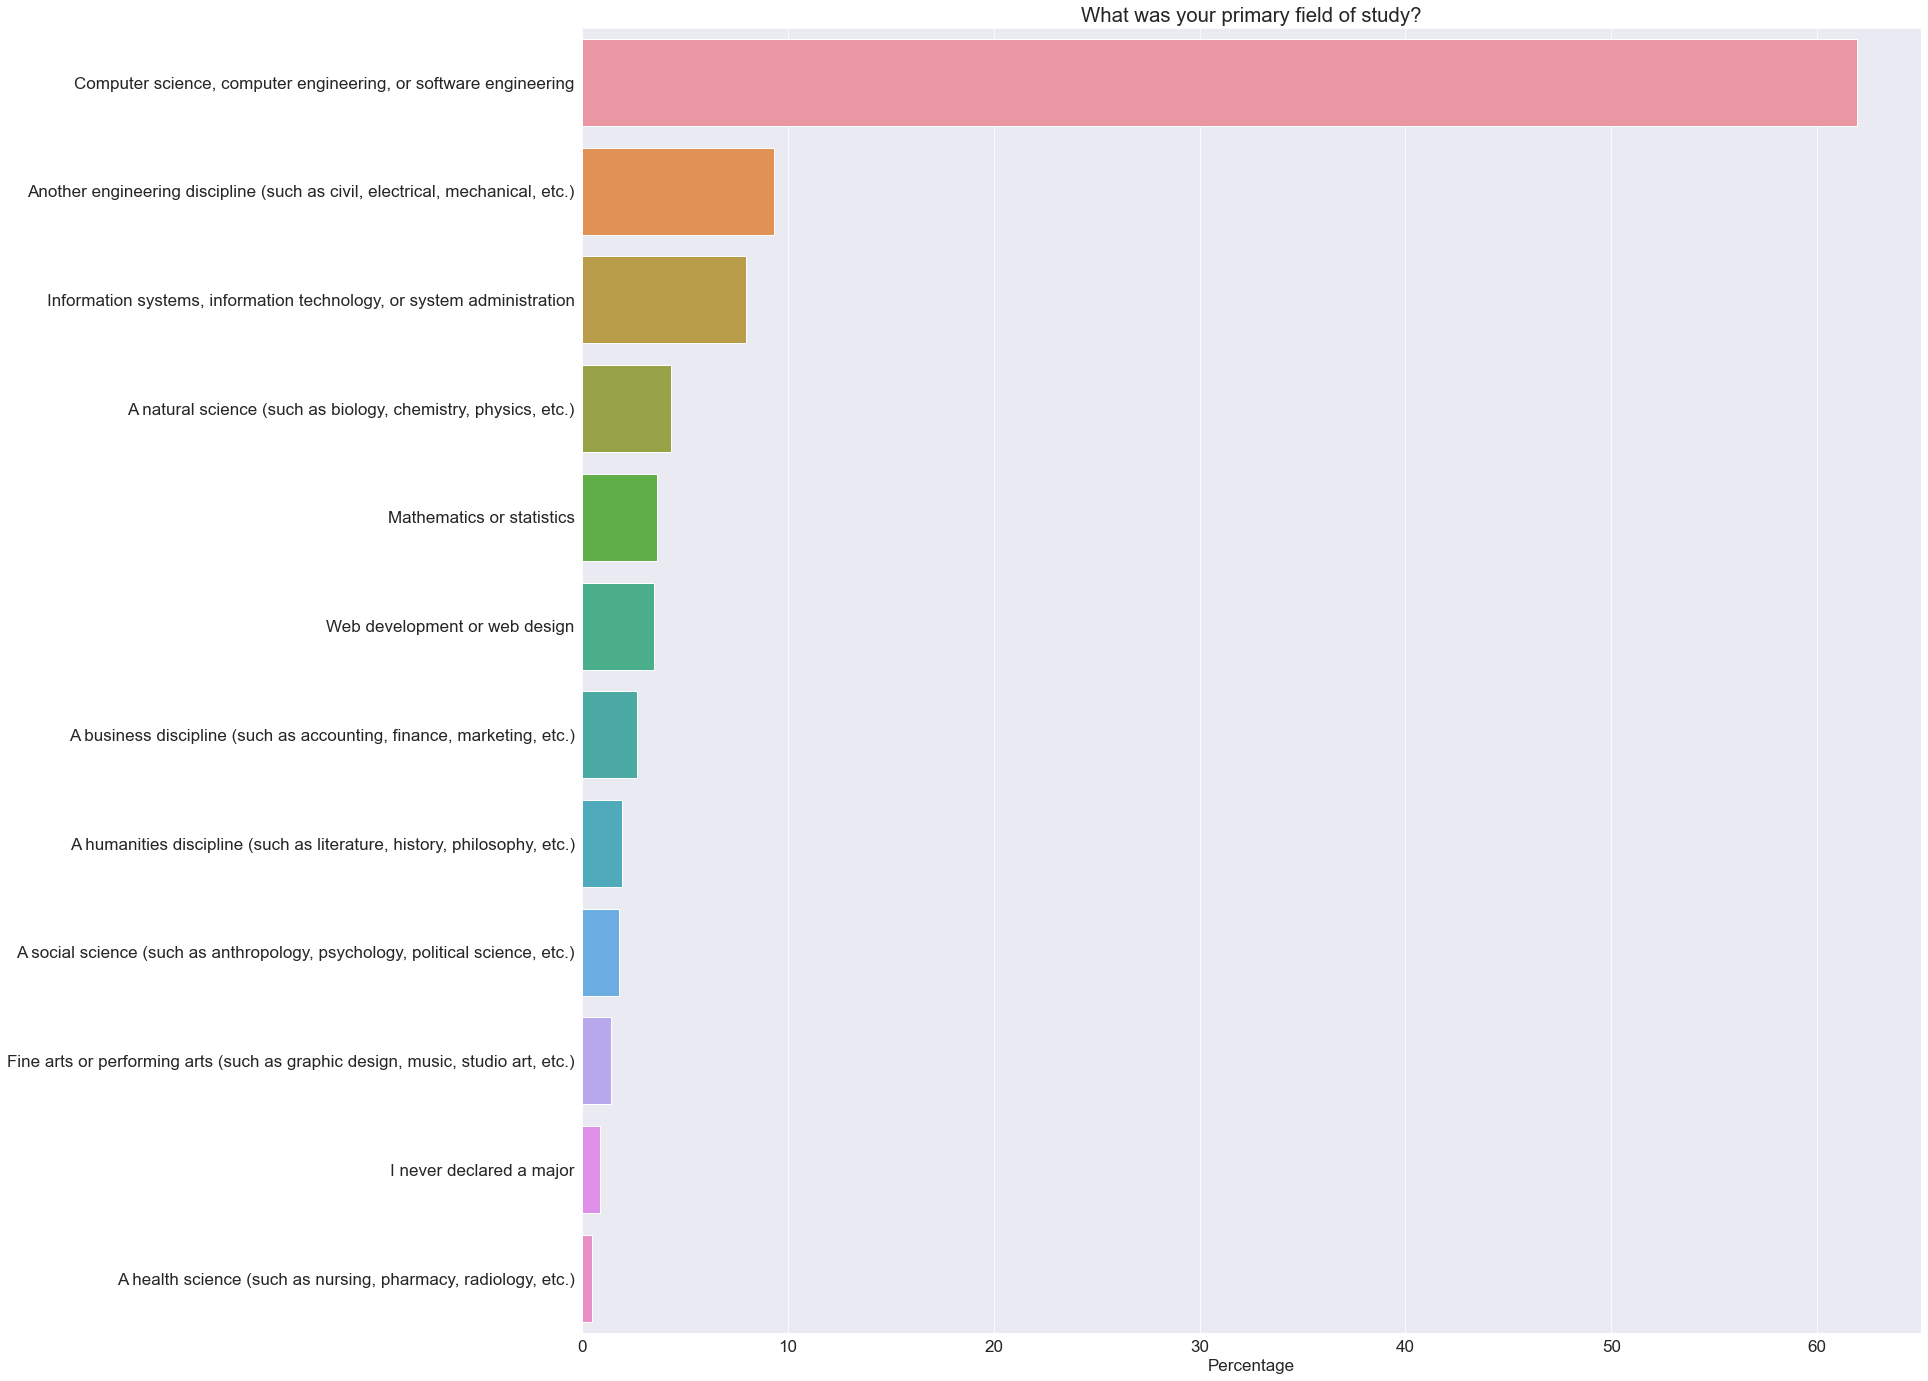

In [61]:
plt.figure(figsize=(24,24))
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema_raw.UndergradMajor)
plt.xlabel('Percentage');

### Employment

###### Analysing Employment column in the data set

In [40]:
schema_raw.Employment

'Which of the following best describes your current employment status?'

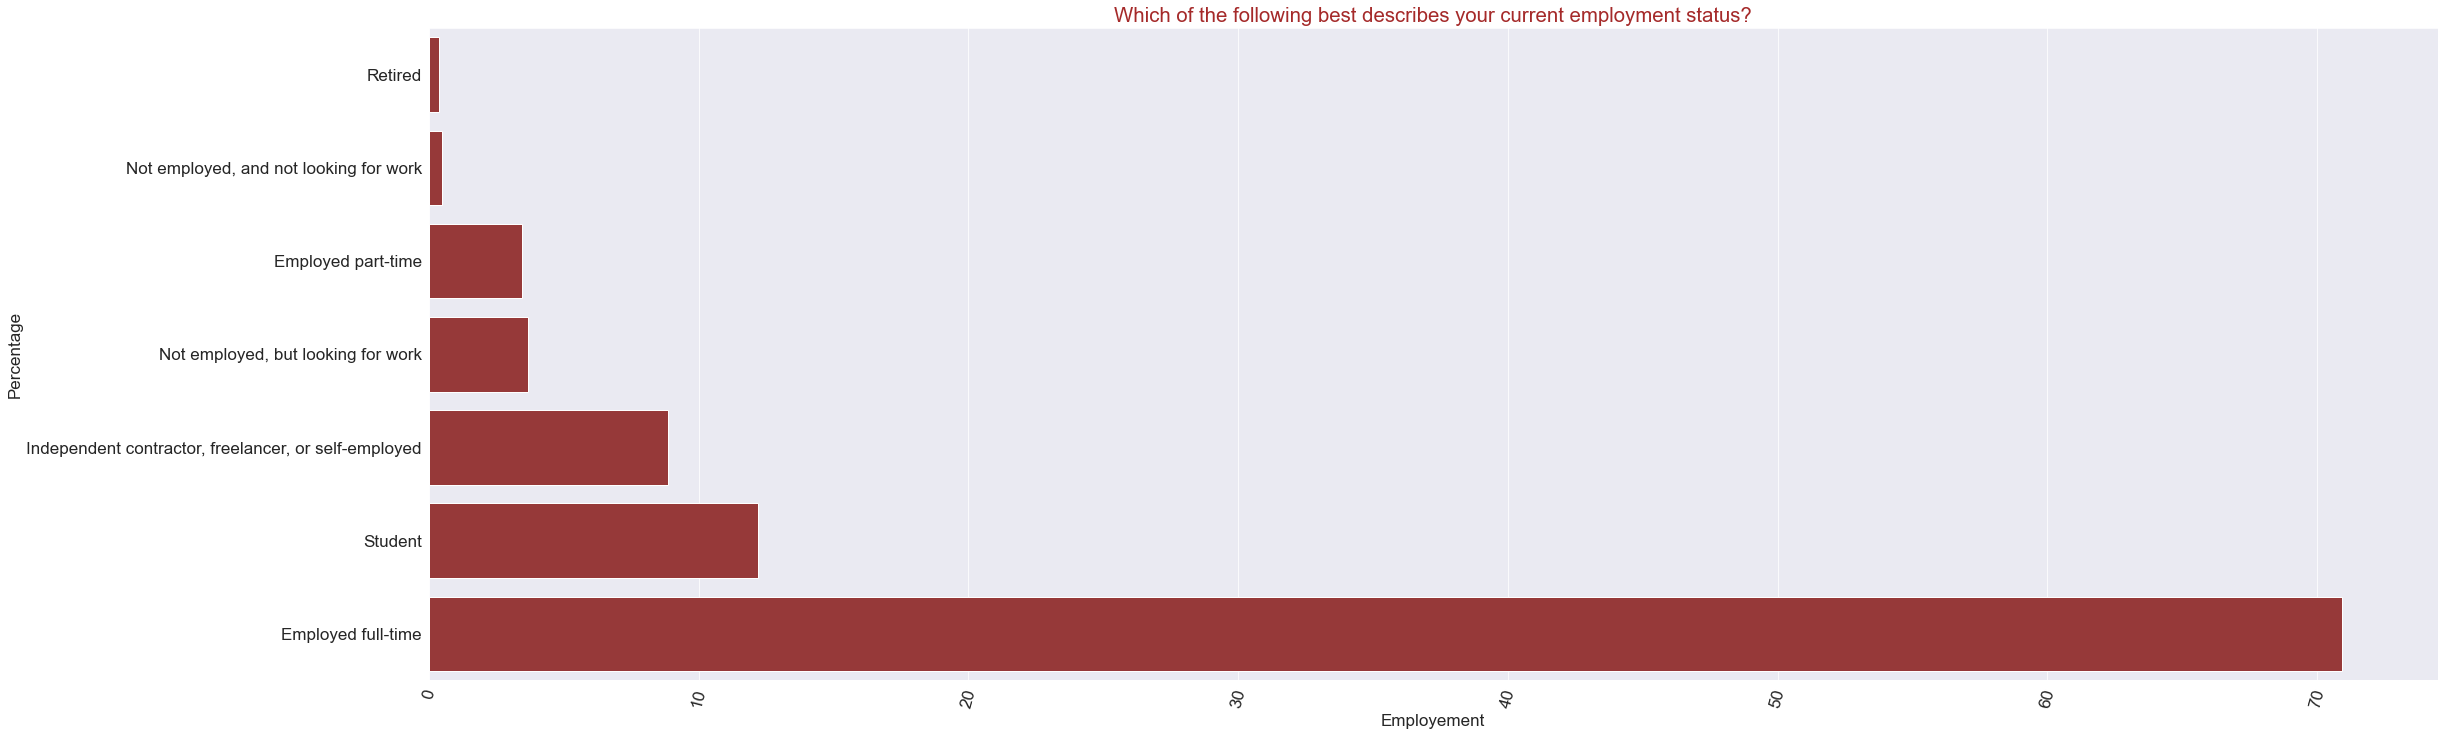

In [41]:
plt.figure(figsize=(36,12))
emp_count=survey_df.Employment.value_counts(normalize=True,ascending=True)*100
sns.barplot(y=emp_count.index,x=emp_count,color='brown')
plt.xticks(rotation=75)
plt.title(schema_raw.Employment,color='brown')
plt.xlabel("Employement")
plt.ylabel("Percentage");

## Asking and Answering Questions

#### Q: What are the most popular programming languages in 2020?

In [42]:
# Ans:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [43]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [44]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

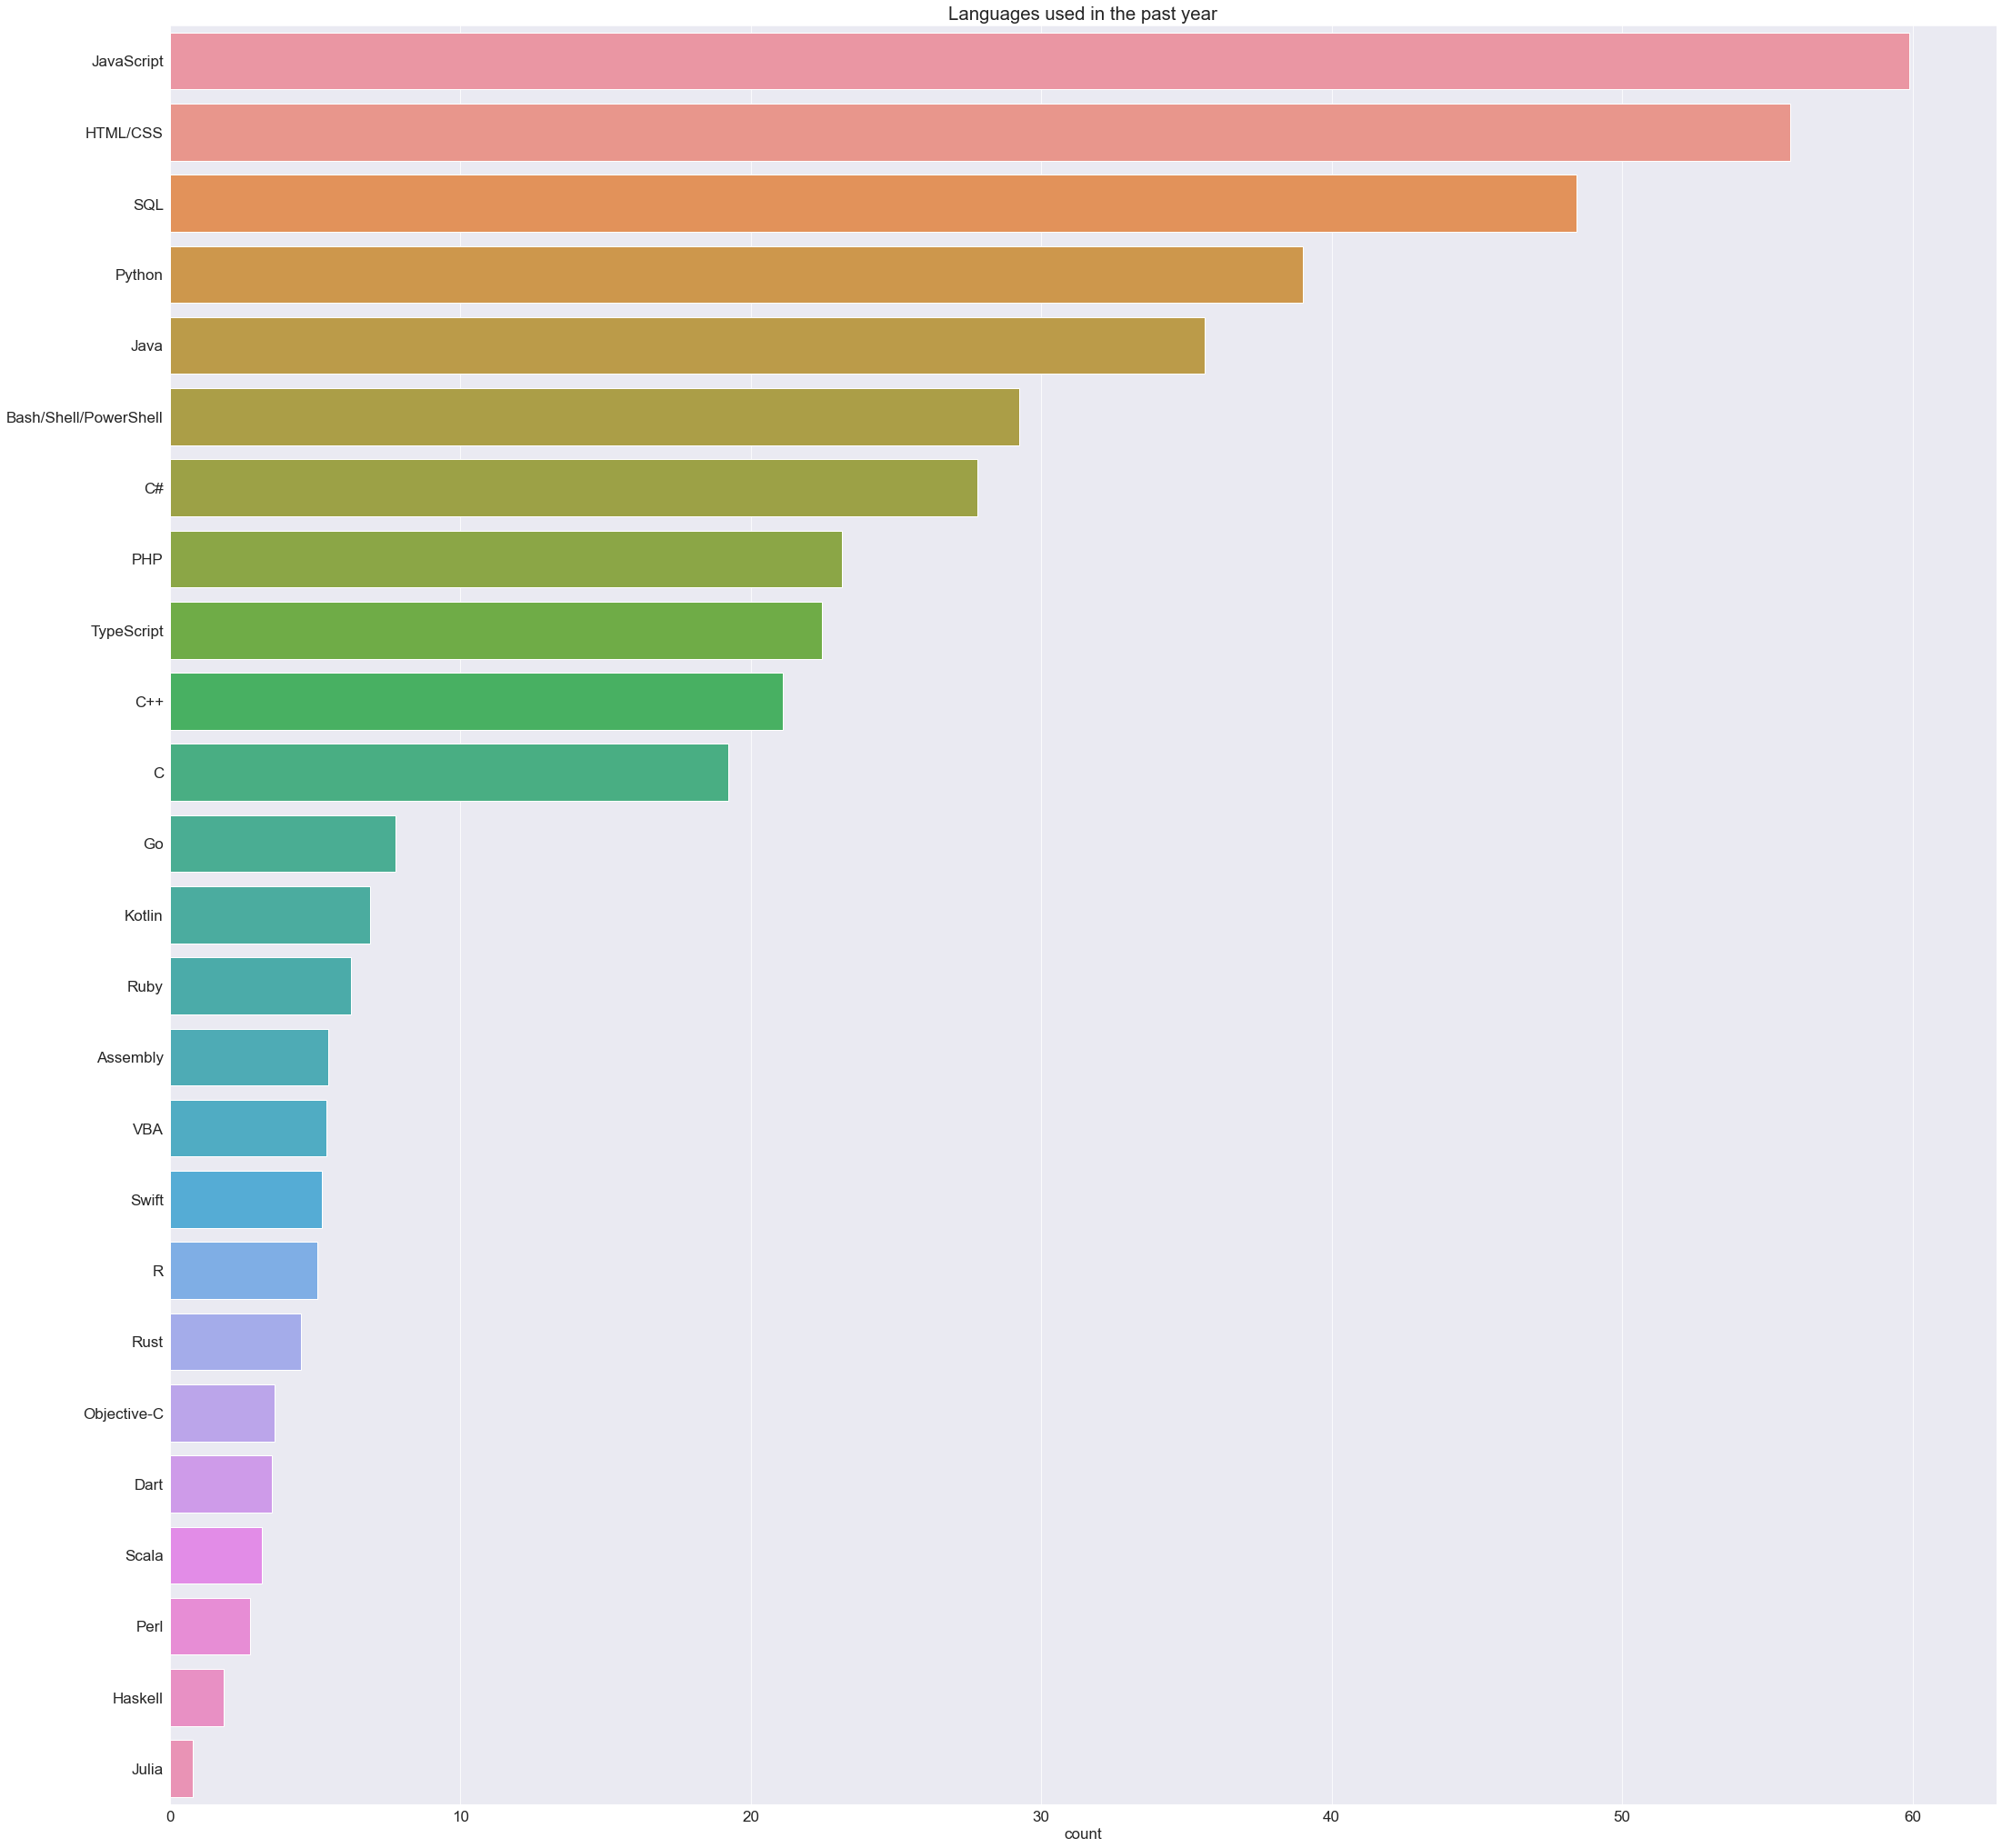

In [65]:
plt.figure(figsize=(36, 36))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

#### Q: Which languages are the most people interested to learn over the next year?

In [47]:
#Ans
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

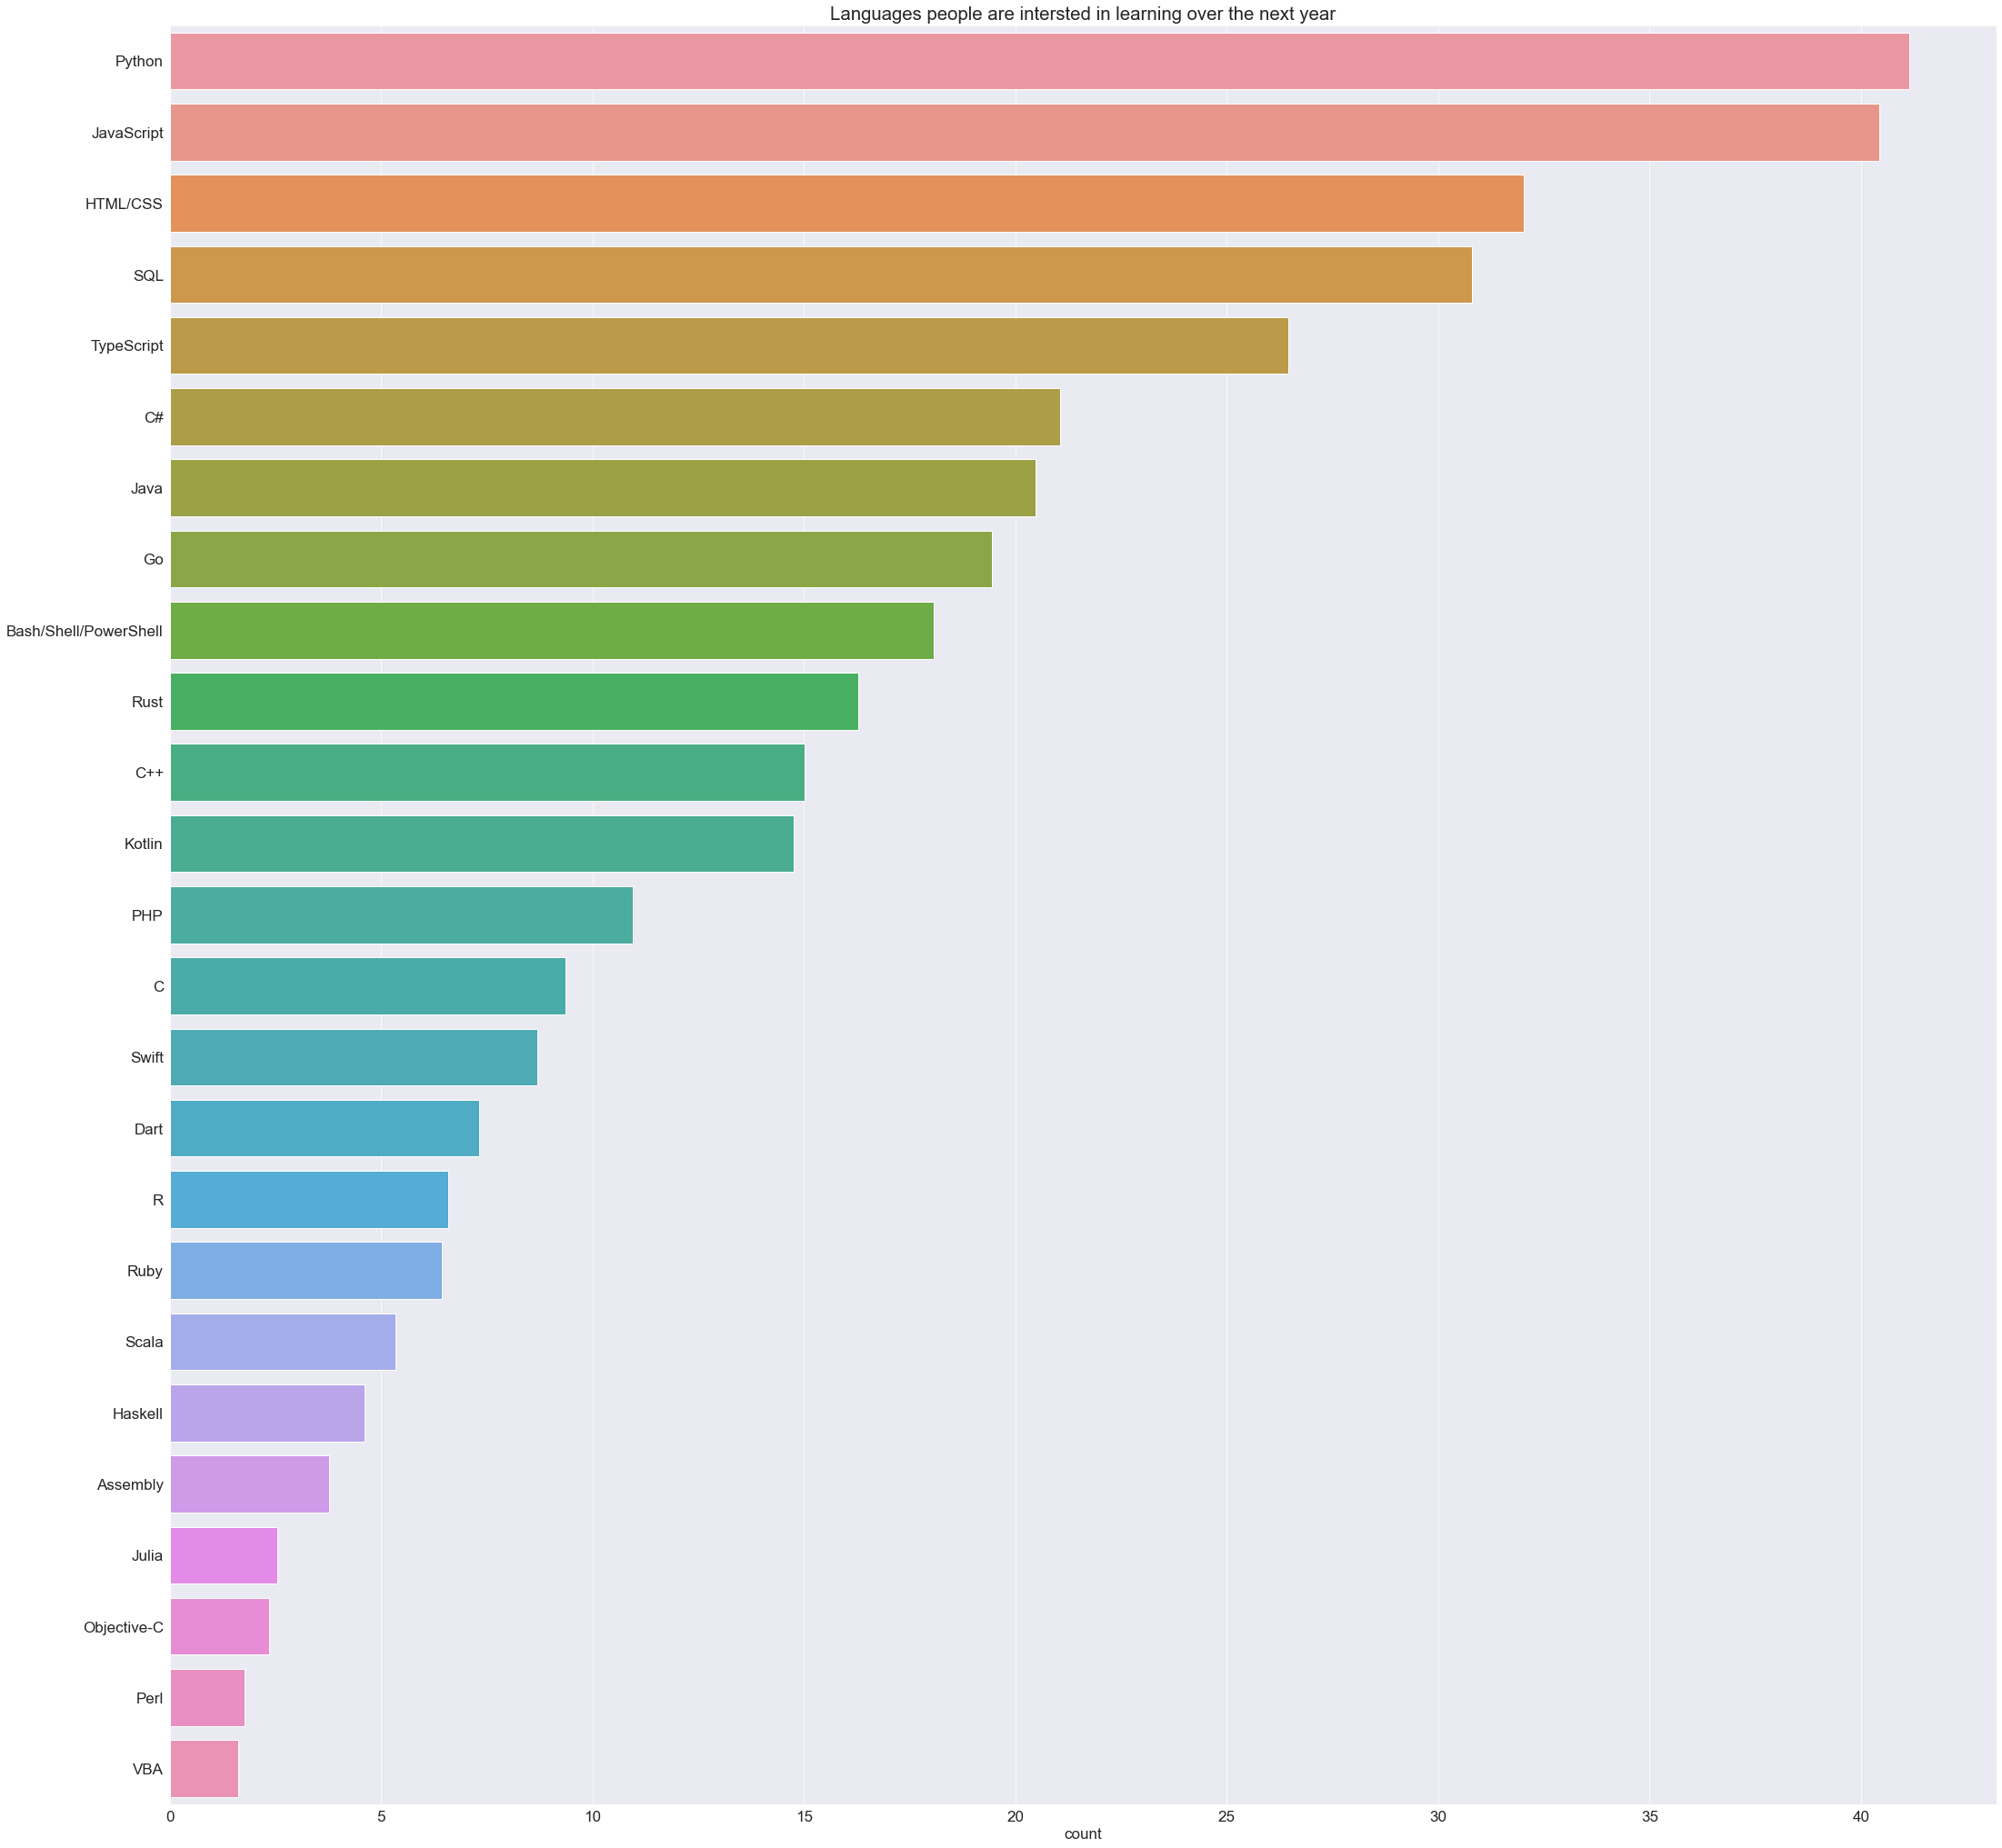

In [63]:
plt.figure(figsize=(36, 36))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

#### Q: Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

In [49]:
languages_loved_df = languages_worked_df & languages_interested_df

In [50]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

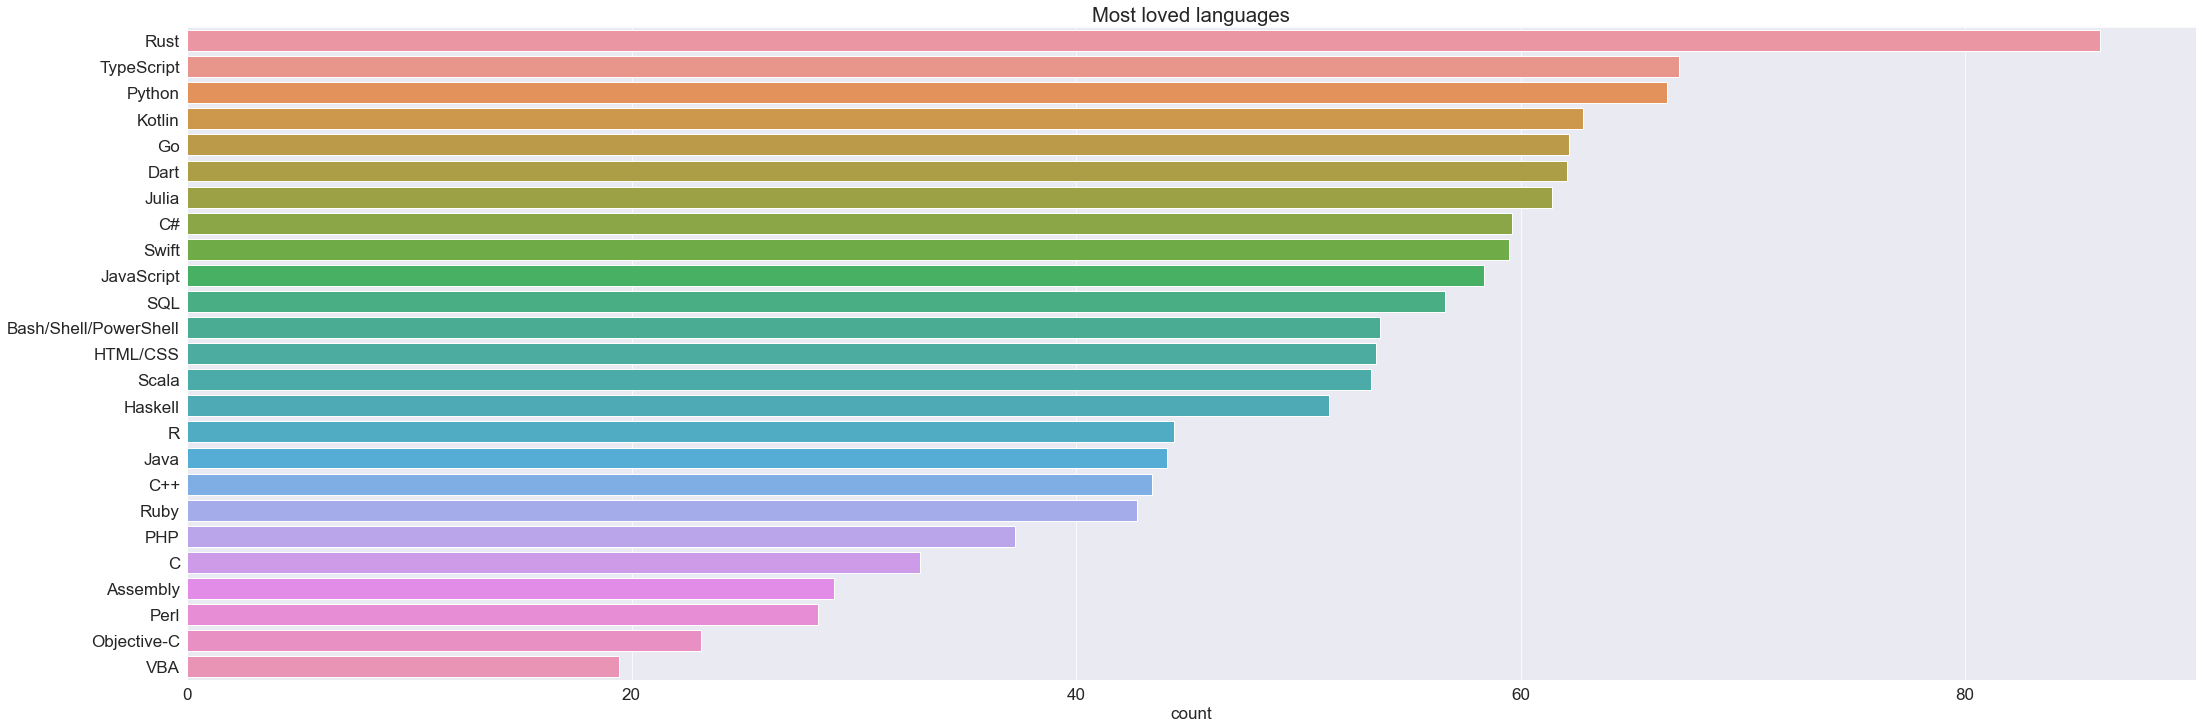

In [51]:
plt.figure(figsize=(36, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

#### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [52]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [53]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [54]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


#### Q: How important is it to start young to build a career in programming?

In [55]:
#Ans

In [56]:
schema_raw.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

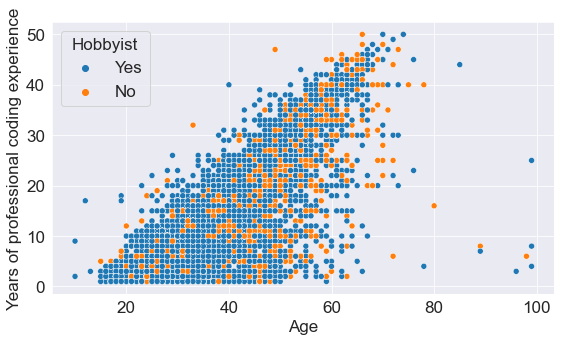

In [57]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
font = {'weight' : 'bold',
        'size'   : 10}
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

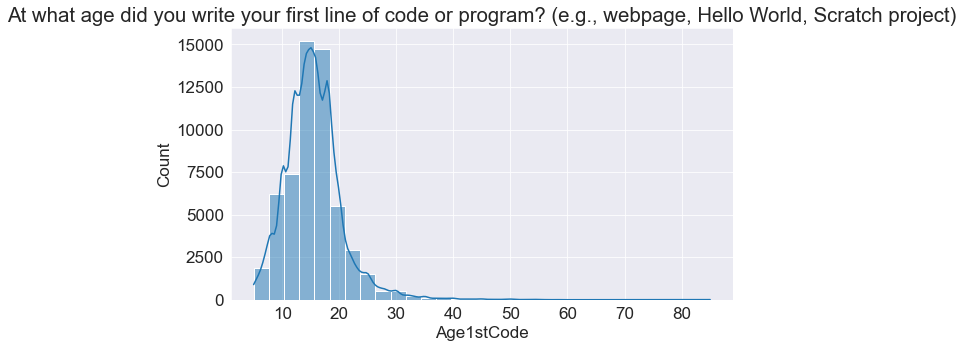

In [58]:
plt.title(schema_raw.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

## Inferences and Conclusions
We've drawn many inferences from the survey. Here's a summary of a few of them:

Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.

Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.